In [1]:
from kan import *
import torch
import matplotlib.pyplot as plt
import copy
import rebound
#torch.set_default_dtype(torch.float64)

# 圆周运动

In [2]:
G = 6.6743e-11
variables = t, M, r, theta = symbols("t M r theta")
print(variables)
#f = lambda x: (x[:,0] * torch.sqrt(G * x[:,1] / x[:,2])) % (2*torch.pi)
f = lambda x: torch.sqrt(x[:,0] * x[:,1] / x[:,2])
#f = lambda x: x[:,0]/x[:,1]
n_var = 3

(t, M, r, theta)


In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#dataset = create_dataset(f = f, n_var = n_var, ranges=[-torch.pi, torch.pi], train_num=3000, test_num=1000, device=device)
dataset = create_dataset(f = f, n_var = n_var, ranges=[0.1,2], train_num=10000, test_num=1000, device=device)
# [[1e5,5e5], [2e30,1e31], [1.5e8, 1e9]]
print(device)
#print(dataset)

cuda


In [28]:
grids = np.array([3,5,10,20])
k = 3
model = KAN(width=[n_var, [1,1], 1], mult_arity=n_var, grid=3, k=3, seed=1, device=device)
# model = KAN(width=[n_var, [1,1], 1], mult_arity=3, base_fun="identity", grid=3, k=3, seed=1, device=device)
#model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1, device=device)

checkpoint directory created: ./model
saving model version 0.0


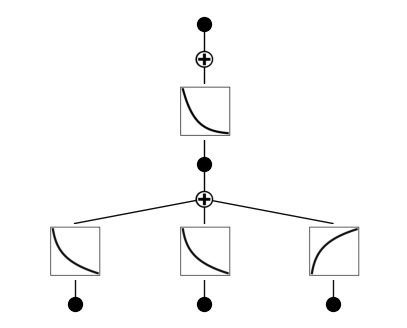

In [33]:
#model.get_act(dataset)
model.plot()

| train_loss: 6.31e-02 | test_loss: 6.08e-02 | reg: 0.00e+00 | : 100%|█| 30/30 [00:24<00:00,  1.22it


saving model version 0.12


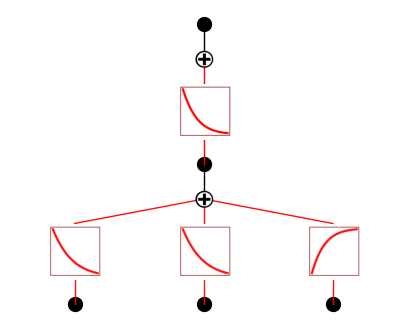

In [36]:
#model.fit(dataset, opt="Adam", steps=30, lamb=1e-3, lamb_entropy=5.)
#model = model.refine(grids[0])
model.fit(dataset, opt="LBFGS", steps=30, lamb=0.002, lamb_entropy=2.);
#model.fit(dataset, opt="Adam", steps=2000, lamb=0.002, lamb_entropy=2.);
#model = model.prune(edge_th=0.15)
model.plot()

In [32]:
steps = 150
train_losses = []
test_losses = []
for i in range(grids.shape[0]):
#for i in range(1):
    print("grid:", grids[i])
    if i == 0:
        model = model.refine(grids[0])
        #model.fit(dataset, opt="LBFGS", steps=steps, lamb=0.002, lamb_entropy=2.)
    if i != 0:
        model = model.refine(grids[i])
    #results = loss = model.fit(dataset, opt="LBFGS", steps=steps)
    results = loss = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']
    

grid: 3
saving model version 0.3


| train_loss: 1.72e-02 | test_loss: 1.66e-02 | reg: 7.57e+00 | : 100%|█| 150/150 [00:33<00:00,  4.44


saving model version 0.4
grid: 5
saving model version 0.5


| train_loss: 7.15e-03 | test_loss: 6.85e-03 | reg: 8.02e+00 | : 100%|█| 150/150 [00:25<00:00,  5.78


saving model version 0.6
grid: 10
saving model version 0.7


| train_loss: 1.71e-03 | test_loss: 1.53e-03 | reg: 7.94e+00 | : 100%|█| 150/150 [00:16<00:00,  8.85


saving model version 0.8
grid: 20
saving model version 0.9


| train_loss: 2.48e-04 | test_loss: 2.37e-04 | reg: 7.93e+00 | : 100%|█| 150/150 [00:14<00:00, 10.22

saving model version 0.10


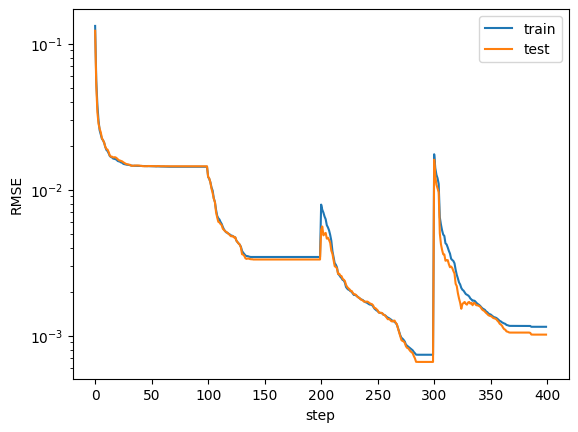

In [91]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

| train_loss: 7.44e-03 | test_loss: 2.45e-03 | reg: 5.83e+00 | : 100%|█| 200/200 [00:19<00:00, 10.16


saving model version 0.12


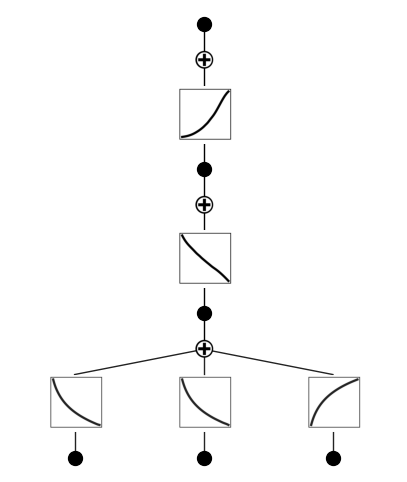

In [14]:
#model = model.refine(10)
loss = model.fit(dataset, opt="LBFGS", steps=steps)
model.plot()

saving model version 0.2


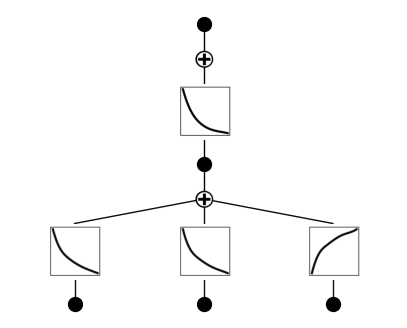

In [31]:
model = model.prune()
#model.prune_edge(threshold=0.15)
#model = model.prune_node()
model.plot()

In [34]:
model.perturb(mode="minimal")

saving model version 0.15


In [35]:
model.auto_symbolic()


model.suggest_symbolic(0,0,0)
model.suggest_symbolic(0,1,0)
model.suggest_symbolic(0,2,0)
model.suggest_symbolic(1,0,0)
#model.suggest_symbolic(1,0,1)
#model.suggest_symbolic(1,0,1)
#model.suggest_symbolic(2,0,0)

#model.fix_symbolic(1,0,0, "exp")
#model.fix_symbolic(0,0,1,"x")
#model.fix_symbolic(0,1,0,"x")

fixing (0,0,0) with log, r2=1.000000238418579, c=2
fixing (0,1,0) with log, r2=1.0000001192092896, c=2
fixing (0,2,0) with log, r2=1.0000001192092896, c=2
fixing (1,0,0) with exp, r2=1.000000238418579, c=2
saving model version 0.11
  function   fitting r2    r2 loss  complexity  complexity loss  total loss
0        0 -100000000.0  26.575425           0                0    5.315085
1        x -100000000.0  26.575425           1                1    6.115085
2      cos -100000000.0  26.575425           2                2    6.915085
3      sin -100000000.0  26.575425           2                2    6.915085
4      log -100000000.0  26.575425           2                2    6.915085
  function   fitting r2    r2 loss  complexity  complexity loss  total loss
0        0 -100000000.0  26.575425           0                0    5.315085
1        x -100000000.0  26.575425           1                1    6.115085
2      cos -100000000.0  26.575425           2                2    6.915085
3      s

('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 -100000000.0,
 0)

In [126]:
# get symbolic formula
print(model.symbolic_formula())
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

([0.00897274911403656 + 21.9984970092773*exp(-41.3756697420768*(0.387828293283808 - exp(-29.9078328656607*(-0.23830252709726 + exp(-3.39621200601101*(-0.040495560575217*x_3 - 1)**2) - 0.408759357471394*exp(-2.54747081209734*(-0.040815698249175*x_2 - 1)**2) - 0.444494271901402*exp(-2.6282545410004*(-0.0393119912091021*x_1 - 1)**2))**2))**2)], [x_1, x_2, x_3])


3/332 + 22*exp(-5172*(97/250 - exp(-7477*(-129/542 + exp(-849*(-x_3/25 - 1)**2/250) - 200*exp(-2547*(-3*x_2/73 - 1)**2/1000)/489 - 103*exp(-657*(-3*x_1/77 - 1)**2/250)/232)**2/250))**2/125)

In [11]:
x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([[2,2,2],[2,2,2]])
print(x/y)

print(x)

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
x.zero_()

tensor([[0, 0, 0],
        [0, 0, 0]])
